# Operadores morfológicos con imágenes en escalas de grises

Podemos ver una imágen 2D como un objeto en tres dimensiones, donde la tercera dimensión está dada por el valor de cada pixel. De esta forma podemos aplicar operadores morfológicos en tres dimensiones sin primero tener que discretizar las imágenes.

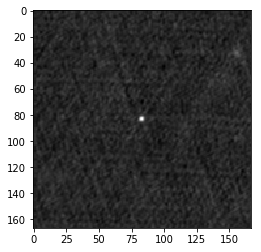

In [8]:
fits_dir = '../imgs/first' #directorio donde tenemos imagenes FIRST
from astropy.io import fits
import skimage as sk
import matplotlib.pyplot as plt #matplotlib para graficar
import numpy as np
im = fits.open('{0}/J145615+605322.fits'.format(fits_dir))
plt.imshow(im[0].data, cmap='gray')
plt.show()

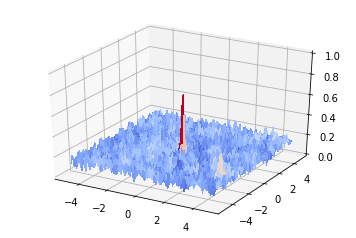

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%run imgutils
img = normalize_img(im[0].data)
X = np.arange(-5, 5, 10/167.0)
Y = np.arange(-5, 5, 10/167.0)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, img, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

Bajo este contexto un elemento estructurante también sería una imágen en escala de grises

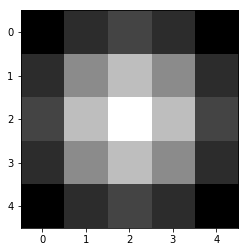

CPU times: user 70.1 ms, sys: 1 µs, total: 70.1 ms
Wall time: 69.8 ms


In [62]:
%%time
from scipy.stats import multivariate_normal
from numba import jit #easy paralleization
def gauss_elem(sz):
    x_i, x_j = sz
    center = (x_i, x_j)
    variances = np.mat('{0},0; 0 {1}'.format(x_i, x_j))
    gauss = multivariate_normal(center, variances)
    img_gauss = np.zeros((2*x_i + 1, 2*x_j + 1), dtype=np.float)
    for i in range(2*x_i + 1):
        for j in range(2*x_j + 1):
            img_gauss[i, j] =  gauss.pdf((i,j))
    return img_gauss

elem = gauss_elem((2, 2))
plt.imshow(elem , cmap='gray')
plt.show()

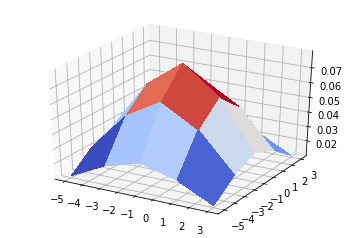

In [66]:
img = normalize_img(im[0].data)
X = np.arange(-5, 5, 10/5)
Y = np.arange(-5, 5, 10/5)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, elem, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()